# Question 1

In [64]:
import pandas as pd

In [65]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [66]:
mean_of_age_per_occupation = users.groupby('occupation').agg({'age': ['mean']})
mean_of_age_per_occupation

,age
,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [67]:
users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [68]:
result_1 = users.groupby('occupation').agg({'age': ['min','max']})
result_1

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [69]:
result_2 = users.groupby(['occupation','gender']).agg({'age': ['mean']})
result_2

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [70]:
df = (users.groupby('occupation')['gender'].value_counts(normalize=True).reset_index(name='perc'))
df

,occupation,gender,perc
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000
5,educator,M,0.726316
6,educator,F,0.273684
7,engineer,M,0.970149
8,engineer,F,0.029851
9,entertainment,M,0.888889


# Question 2 

In [71]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [72]:
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [73]:
teams_count_1= euro12['Team'].count()
teams_count_1

16

In [74]:
len(euro12.columns)

35

In [75]:
discipline_1 = euro12[['Team','Yellow Cards','Red Cards']]
discipline_1

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [76]:
all_sorted_values = discipline_1.sort_values(['Red Cards','Yellow Cards'])
all_sorted_values

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [77]:
mean_of_yellow_cards = discipline_1.groupby('Team').agg({'Yellow Cards': ['mean']})
mean_of_yellow_cards

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [78]:
all_goals_per_team = euro12[['Team','Goals']]
great_goals = all_goals_per_team[all_goals_per_team['Goals']  > 6]
great_goals

,Team,Goals
5,Germany,10
13,Spain,12


In [79]:
Team_names = euro12['Team']
new_val = Team_names[Team_names.str.startswith("G")]
new_val

5    Germany
6     Greece
Name: Team, dtype: object

In [80]:
euro12.iloc[:, list(range(7))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [81]:
euro12.iloc[:, list(range(32))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [82]:
goal_shooting_accuracy = euro12[['Team','Shooting Accuracy']]
val = goal_shooting_accuracy.loc[goal_shooting_accuracy.Team.isin(['England','Italy','Russia'])]
val

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [83]:
import pandas as pd
import numpy as np

In [84]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     4
1     3
2     1
3     2
4     3
     ..
95    4
96    1
97    3
98    3
99    1
Length: 100, dtype: int32 0     1
1     2
2     1
3     2
4     2
     ..
95    3
96    1
97    2
98    2
99    3
Length: 100, dtype: int32 0     24377
1     12405
2     24055
3     22770
4     19843
      ...  
95    18230
96    12156
97    15323
98    27794
99    23281
Length: 100, dtype: int32


In [85]:
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,4,1,24377
1,3,2,12405
2,1,1,24055
3,2,2,22770
4,3,2,19843


In [86]:
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,24377
1,3,2,12405
2,1,1,24055
3,2,2,22770
4,3,2,19843


In [87]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))
bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,4
1,3
2,1
3,2
4,3
...,...
95,18230
96,12156
97,15323
98,27794


In [88]:
len(bigcolumn)

300

NO,It is not true

In [89]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,4
1,3
2,1
3,2
4,3
...,...
295,18230
296,12156
297,15323
298,27794


# Question 8

In [90]:
import matplotlib
import matplotlib.pyplot as plt

In [91]:
kill_counts = pd.read_csv("C:\\Users\\majil\\Downloads\\actor_kill_counts.csv")
kill_counts_sorted = kill_counts.sort_values('Count',ascending = False)
kill_counts_sorted

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


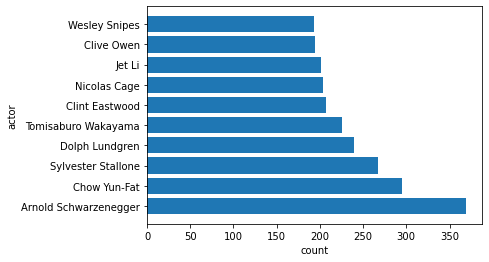

In [92]:
plt.barh(kill_counts_sorted['Actor'],kill_counts_sorted['Count'])
plt.xlabel('count')
plt.ylabel('actor')
plt.show()

# Question 9

In [93]:
roman_regime = pd.read_csv("C:\\Users\\majil\\Downloads\\roman-emperor-reigns.csv")
roman_regime.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [94]:
the_cause_of_death = roman_regime['Cause_of_Death'].value_counts()
the_cause_of_death

Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

<AxesSubplot:ylabel='Cause_of_Death'>

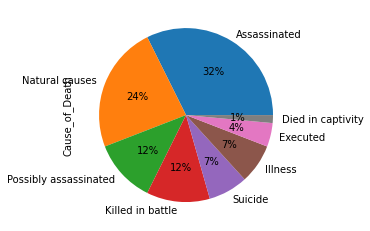

In [95]:
the_cause_of_death.plot(kind='pie',autopct='%1.0f%%')

# Question 10

In [96]:
the_arcade_revenue = pd.read_csv("C:\\Users\\majil\\Downloads\\arcade-revenue-vs-cs-doctorates.csv")
the_arcade_revenue

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Computer Science Doctorates Awarded (US)', ylabel='Total Arcade Revenue (billions)'>

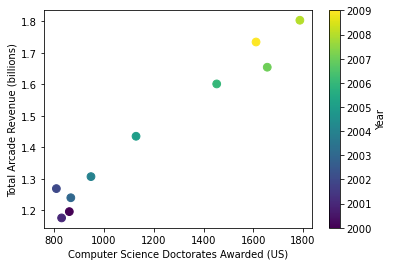

In [97]:
fig, ax = plt.subplots()
the_arcade_revenue.plot.scatter(x = 'Computer Science Doctorates Awarded (US)', y = 'Total Arcade Revenue (billions)',s=60,c = 'Year',colormap='viridis',ax=ax)